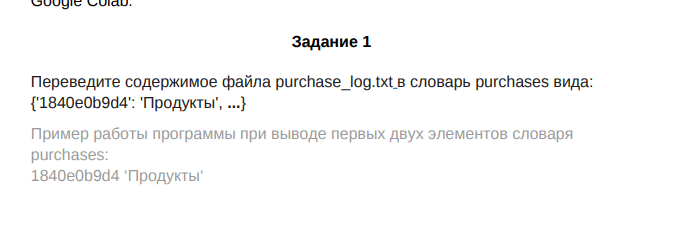

In [41]:
# task 1
import json
from collections import OrderedDict
# 'user_id': 'category'
purchases = OrderedDict()

first = True
with open('./datasets/purchase_log.txt', 'r', encoding='utf-8') as file:
    for line in file:
        if first:
            first = False
            continue
            
        line = json.loads(line)
        purchases[line['user_id']] = line['category']

In [42]:
for k,v in purchases.items():
    print(k,v)
    break

1840e0b9d4 Продукты


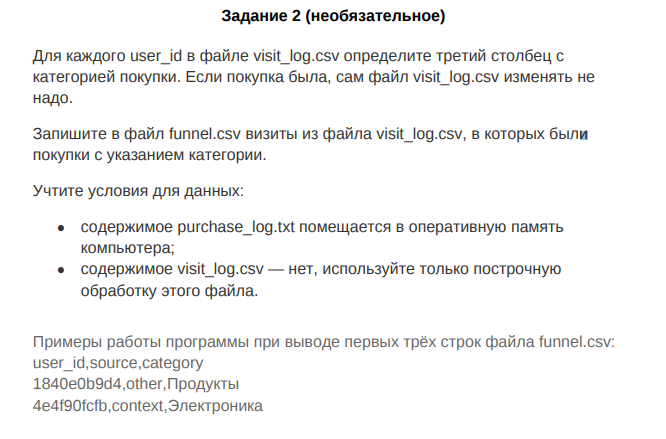

In [49]:
first = True
with open('./datasets/visit_log.csv', 'r', encoding='utf-8') as read_file:
    with open('./datasets/funnel.csv', 'w', encoding='utf-8') as write_file:
        for line in read_file:
            if first:
                first = False
                write_file.write('user_id,source,category\n')
                continue
            user_id, source = line.strip().split(',')
            try:
                category =  purchases[user_id]
                write_file.write(f'{user_id},{source},{category}\n')
            except:
                continue
            # break

In [51]:
i = 0
with open('./datasets/funnel.csv', 'r', encoding='utf-8') as file:
    while i < 3:
        print(file.readline())
        i+=1

user_id,source,category

1840e0b9d4,other,Продукты

4e4f90fcfb,context,Электроника



In [ ]:
# Easier but RAM costly

In [23]:
import pandas as pd

df = pd.DataFrame(purchases)
df2 = pd.read_csv('./datasets/visit_log.csv')

In [26]:
df.merge(df2, how='left', on='user_id')

,user_id,category,source
0,1840e0b9d4,Продукты,other
1,4e4f90fcfb,Электроника,context
2,afea8d72fc,Электроника,other
3,373a6055fe,Бытовая техника,other
4,9b2ab046f3,Электроника,other
...,...,...,...
100263,3c28d01383,Досуг,NaN
100264,6948899ab3,Продукты,NaN
100265,610a548d34,Электроника,NaN
100266,cb9fd67953,Бытовая техника,NaN
